In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import os

In [4]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [12]:
def data_extraction_all(raw, labels):
    combine_dataframe = []
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(mean)

        std = raw.values[i].std()
        combine_dataframe.append(std)

        snr = signaltonoise(raw.values[i])
        combine_dataframe.append(snr)
    combine_dataframe.append(labels)
    final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr','label'])
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    final_dataframe.reset_index()
    return final_dataframe

In [6]:
import glob
import os
df_normal = pd.DataFrame([], )
labels = 1
for filename in glob.glob('./dataset/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:600]
        raw = pd.DataFrame(my_signals)
        #raw_fix = pd.concat([raw, raw])
        #raw_fix = pd.DataFrame.transpose(raw)
        
        df_normal = df_normal.append(data_extraction_all(raw, labels))
        
        #df.append(data_extraction_all(raw))
df_normal.reset_index(drop=True, inplace=True)        

In [7]:
df_normal.head(10)

,FP1_mean,FP1_std,FP1_snr,F3_mean,F3_std,F3_snr,F7_mean,F7_std,F7_snr,T3_mean,...,Pz_mean,Pz_std,Pz_snr,Oz_mean,Oz_std,Oz_snr,O2_mean,O2_std,O2_snr,label
0,-11.116051,16.491159,-0.6740611791610718,-4.7784,17.079874,-0.2797679007053375,-2.455134,13.187933,-0.18616516888141632,0.380094,...,-3.165888,16.252666,-0.19479191303253174,2.396196,14.219934,0.16850964725017548,5.820804,15.475842,0.3761219382286072,1
1,-8.171988,15.140364,-0.53974848985672,-12.955932,15.460031,-0.8380275368690491,-17.282957,18.697525,-0.9243446588516235,2.203542,...,-12.932898,13.590762,-0.9515947103500366,-11.066087,13.887566,-0.7968341708183289,-13.898016,13.93366,-0.9974418878555298,1
2,-4.560996,13.027676,-0.3501005172729492,-6.973559,11.72615,-0.5947015285491943,-5.860602,13.962685,-0.4197331964969635,-11.684772,...,-22.201738,12.997419,-1.708165168762207,-28.860678,15.908123,-1.8142101764678955,-22.70961,15.690781,-1.447321891784668,1
3,57.090931,147.24678,0.38772279024124146,50.19841,98.444107,0.5099178552627563,30.293209,85.641716,0.3537202477455139,26.713236,...,49.25098,78.949997,0.623824954032898,42.834198,80.009995,0.53536057472229,55.88036,80.525314,0.6939477324485779,1
4,-18.999088,46.452782,-0.40899786353111267,-28.09026,36.983448,-0.7595359683036804,16.000843,49.999283,0.32002145051956177,15.861317,...,-17.479107,30.305105,-0.5767710208892822,-21.974899,27.144981,-0.8095381855964661,-12.205183,32.198765,-0.37905749678611755,1
5,0.724681,30.452911,0.02379676140844822,4.19595,26.953686,0.1556725651025772,-35.463516,24.90036,-1.4242169857025146,-7.854726,...,6.155357,30.08477,0.20460043847560883,6.159318,30.513994,0.2018522471189499,8.38728,31.666452,0.2648632526397705,1
6,-66.824409,75.448555,-0.8856950402259827,-56.615788,69.851532,-0.8105160593986511,4.605613,153.004425,0.030101176351308823,-27.47765,...,-56.165207,51.963459,-1.080859661102295,-59.655289,47.572411,-1.2539892196655273,-63.429829,48.794544,-1.2999368906021118,1
7,24.90543,48.376408,0.5148259401321411,117.942596,197.963821,0.5957785248756409,25.101713,40.77298,0.6156457662582397,21.040602,...,-55.778828,562.127869,-0.09922800958156586,-144.891724,876.716553,-0.16526632010936737,-137.240402,87.090248,-1.5758411884307861,1
8,0.073854,16.011988,0.004612419754266739,6.610494,16.632645,0.39744094014167786,-0.140316,14.913377,-0.009408729150891304,10.661574,...,8.462783,16.074511,0.5264722108840942,7.808723,19.311195,0.4043624997138977,8.739588,22.233822,0.3930762708187103,1


In [23]:
df_epileps = pd.DataFrame([])
labels = 0
for filename in glob.glob('./dataset/autism/*.dat'):
    with b2k.BCI2kReader(filename) as test2:
        my_states2 = test2.read(-1)
        my_signals2, stateslice2 = test2[100:600]
        raw2 = pd.DataFrame(my_signals2)
        df_epileps = df_epileps.append(data_extraction_all(raw2, labels))
df_epileps.reset_index(drop=True, inplace=True) 

C:\Users\YAP\AppData\Local\Temp/ipykernel_22760/2739071268.py:5: RuntimeWarning: divide by zero encountered in float_scalars
  return np.where(sd == 0, 0, m/sd)


In [24]:
df_epileps.head(20)

,FP1_mean,FP1_std,FP1_snr,F3_mean,F3_std,F3_snr,F7_mean,F7_std,F7_snr,T3_mean,...,Pz_mean,Pz_std,Pz_snr,Oz_mean,Oz_std,Oz_snr,O2_mean,O2_std,O2_snr,label
0,-53.527649,41.892773,-1.277729868888855,-90.048691,43.321213,-2.0786280632019043,-26.723532,40.389816,-0.6616403460502625,-4.275678,...,5.180472,23.058361,0.22466783225536346,2.740254,21.809258,0.12564636766910553,48.638634,22.906048,2.1233971118927,0
1,-5.012503,27.529764,-0.18207575380802155,50.116241,33.498215,1.4960869550704956,3.17955,24.153322,0.13164030015468597,-0.409332,...,10.474596,22.78174,0.45978033542633057,28.409767,26.057804,1.0902594327926636,8.816544,24.973442,0.3530367910861969,0
2,-123.300735,43.223682,-2.8526198863983154,-174.228333,35.162872,-4.954894542694092,-82.32325,38.38102,-2.14489483833313,-47.142807,...,-124.540222,32.157192,-3.8728575706481934,-90.874016,28.4102,-3.1986405849456787,-97.536575,25.945841,-3.759237289428711,0
3,12.940026,17.850258,0.7249209880828857,-68.172188,48.176308,-1.4150563478469849,6.47922,18.837368,0.3439556956291199,3.031578,...,7.926929,18.344212,0.4321215748786926,8.985239,18.304218,0.4908835291862488,-6.45084,15.747002,-0.4096551239490509,0
4,35.105133,34.443817,1.0191998481750488,134.077606,35.271099,3.801344633102417,43.93409,28.677006,1.5320320129394531,22.654301,...,18.949062,28.41086,0.6669654846191406,15.598508,49.488903,0.3151920437812805,3.689598,31.59329,0.11678421497344971,0
5,-58.421349,129.66983,-0.4505392611026764,-60.541069,126.405426,-0.4789435863494873,-15.28216,96.954208,-0.15762245655059814,-12.441131,...,-49.546001,91.949081,-0.538841724395752,-22.379278,91.170441,-0.24546638131141663,-2.319303,81.749115,-0.02837098389863968,0
6,360.75943,1014.885376,0.35546815395355225,-137.54509,818.327393,-0.16808076202869415,396.360443,969.641296,0.4087701737880707,54.434032,...,-136.056183,818.515015,-0.1662231981754303,-136.295059,818.152771,-0.16658876836299896,-137.091812,818.410706,-0.1675097942352295,0
7,-43.235313,1080.429077,-0.04001680016517639,-100.201622,1075.455078,-0.0931713655591011,-103.723999,1075.057861,-0.09648224711418152,-100.211189,...,-100.174438,1075.455322,-0.09314607083797455,-100.194687,1075.456787,-0.09316477179527283,-100.168503,1075.454712,-0.0931406021118164,0
8,29.068777,143.12178,0.20310519635677338,75.84272,165.561234,0.45809468626976013,162.163391,185.530823,0.8740509748458862,157.122787,...,48.788521,84.62764,0.576508104801178,31.022243,90.662186,0.3421740233898163,46.902966,84.109032,0.5576448440551758,0
9,17.617641,274.928009,0.06408092379570007,87.811157,140.692841,0.624133825302124,65.246071,184.954498,0.3527682423591614,41.407928,...,48.069653,132.315826,0.3632948100566864,138.07753,144.382904,0.956328809261322,61.159557,130.369843,0.469123512506485,0


In [25]:
raw2.shape

(16, 500)

Text(0.5, 1.0, 'Normal EEG signal Signature')

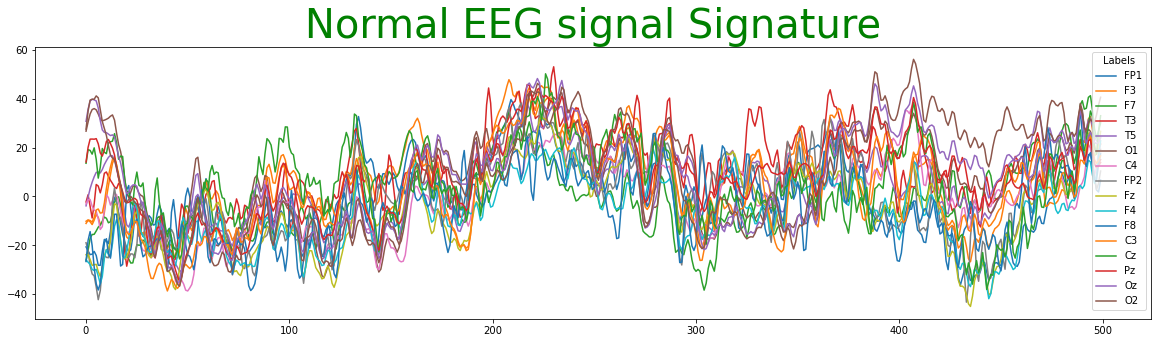

In [54]:
plot_normal_eeg = pd.DataFrame(my_signals)
plot_normal_eeg = pd.DataFrame.transpose(plot_normal_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_normal_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Labels')
plt.title("Normal EEG signal Signature",  fontsize=40, color="green")

Text(0.5, 1.0, 'Autism EEG signal Signature')

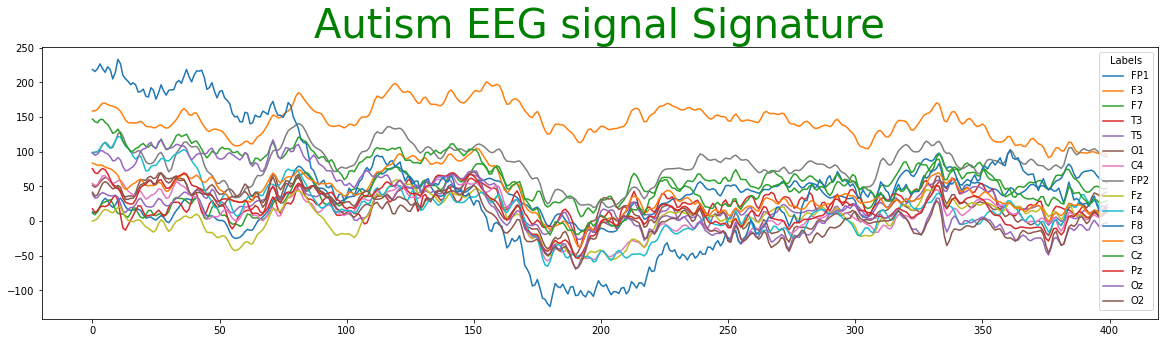

In [55]:
filename3 = "./dataset/autism/Bader_Autism_24_11_2011S001R09.dat"
with b2k.BCI2kReader(filename3) as test3:
        my_states = test3.read(-1)
        my_signals3, stateslice3 = test3[100:500]
        
plot_autism_eeg = pd.DataFrame(my_signals3)
plot_autism_eeg = pd.DataFrame.transpose(plot_autism_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_autism_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Labels')
plt.title("Autism EEG signal Signature",  fontsize=40, color="green")

In [41]:
all_fixed_eeg_dataset = pd.DataFrame([],)

all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_normal)
all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_epileps)

In [42]:
all_fixed_eeg_dataset.head(100)

,FP1_mean,FP1_std,FP1_snr,F3_mean,F3_std,F3_snr,F7_mean,F7_std,F7_snr,T3_mean,...,Pz_mean,Pz_std,Pz_snr,Oz_mean,Oz_std,Oz_snr,O2_mean,O2_std,O2_snr,label
0,-11.116051,16.491159,-0.6740611791610718,-4.7784,17.079874,-0.2797679007053375,-2.455134,13.187933,-0.18616516888141632,0.380094,...,-3.165888,16.252666,-0.19479191303253174,2.396196,14.219934,0.16850964725017548,5.820804,15.475842,0.3761219382286072,1
1,-8.171988,15.140364,-0.53974848985672,-12.955932,15.460031,-0.8380275368690491,-17.282957,18.697525,-0.9243446588516235,2.203542,...,-12.932898,13.590762,-0.9515947103500366,-11.066087,13.887566,-0.7968341708183289,-13.898016,13.93366,-0.9974418878555298,1
2,-4.560996,13.027676,-0.3501005172729492,-6.973559,11.72615,-0.5947015285491943,-5.860602,13.962685,-0.4197331964969635,-11.684772,...,-22.201738,12.997419,-1.708165168762207,-28.860678,15.908123,-1.8142101764678955,-22.70961,15.690781,-1.447321891784668,1
3,57.090931,147.24678,0.38772279024124146,50.19841,98.444107,0.5099178552627563,30.293209,85.641716,0.3537202477455139,26.713236,...,49.25098,78.949997,0.623824954032898,42.834198,80.009995,0.53536057472229,55.88036,80.525314,0.6939477324485779,1
4,-18.999088,46.452782,-0.40899786353111267,-28.09026,36.983448,-0.7595359683036804,16.000843,49.999283,0.32002145051956177,15.861317,...,-17.479107,30.305105,-0.5767710208892822,-21.974899,27.144981,-0.8095381855964661,-12.205183,32.198765,-0.37905749678611755,1
5,0.724681,30.452911,0.02379676140844822,4.19595,26.953686,0.1556725651025772,-35.463516,24.90036,-1.4242169857025146,-7.854726,...,6.155357,30.08477,0.20460043847560883,6.159318,30.513994,0.2018522471189499,8.38728,31.666452,0.2648632526397705,1
6,-66.824409,75.448555,-0.8856950402259827,-56.615788,69.851532,-0.8105160593986511,4.605613,153.004425,0.030101176351308823,-27.47765,...,-56.165207,51.963459,-1.080859661102295,-59.655289,47.572411,-1.2539892196655273,-63.429829,48.794544,-1.2999368906021118,1
7,24.90543,48.376408,0.5148259401321411,117.942596,197.963821,0.5957785248756409,25.101713,40.77298,0.6156457662582397,21.040602,...,-55.778828,562.127869,-0.09922800958156586,-144.891724,876.716553,-0.16526632010936737,-137.240402,87.090248,-1.5758411884307861,1
8,0.073854,16.011988,0.004612419754266739,6.610494,16.632645,0.39744094014167786,-0.140316,14.913377,-0.009408729150891304,10.661574,...,8.462783,16.074511,0.5264722108840942,7.808723,19.311195,0.4043624997138977,8.739588,22.233822,0.3930762708187103,1
0,-53.527649,41.892773,-1.277729868888855,-90.048691,43.321213,-2.0786280632019043,-26.723532,40.389816,-0.6616403460502625,-4.275678,...,5.180472,23.058361,0.22466783225536346,2.740254,21.809258,0.12564636766910553,48.638634,22.906048,2.1233971118927,0


In [52]:
plot_autism_eeg.index

RangeIndex(start=0, stop=400, step=1)